In [79]:
import pandas as pd

df = pd.read_csv('covid-data.csv')
df[["gdp_per_capital" , "life_expectancy"]]
df2 = pd.read_csv('countries of the world.csv')
df2[["Country"]]
print(df)


       iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan   5/1/2020          NaN        0.0   
1           AFG      Asia  Afghanistan   6/1/2020          NaN        0.0   
2           AFG      Asia  Afghanistan   7/1/2020          NaN        0.0   
3           AFG      Asia  Afghanistan   8/1/2020          NaN        0.0   
4           AFG      Asia  Afghanistan   9/1/2020          NaN        0.0   
...         ...       ...          ...        ...          ...        ...   
390755      ZWE    Africa     Zimbabwe  27/3/2024     266359.0        0.0   
390756      ZWE    Africa     Zimbabwe  28/3/2024     266359.0        0.0   
390757      ZWE    Africa     Zimbabwe  29/3/2024     266359.0        0.0   
390758      ZWE    Africa     Zimbabwe  30/3/2024     266359.0        0.0   
390759      ZWE    Africa     Zimbabwe  31/3/2024     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  

In [161]:
import pandas as pd
import numpy as np

df = pd.read_csv('covid-data.csv')

df.iloc[:,4:len(df.columns)-1] = df.iloc[:,4:len(df.columns)-1].fillna(0)

df = df.groupby(["location"],as_index=False).agg('last')
df = df.drop(["iso_code","date"],axis=1)
df.set_index("location",inplace=True)
df = df.drop(["Asia", "Africa", "Oceania", "Europe","World"])
df.reset_index(inplace=True)
df.columns = df.columns.str.replace("location","Country")
#find total cases?

tally = []
for i in df.index:
    tally.append((df.iloc[i]["Country"] ,df.iloc[i]["total_cases"]))

def getmax(a):
    return a[1]

tally = sorted(tally,key=getmax, reverse=True)
print(tally)
print(f"Country with highest covid cases is {tally[0]}")


[('China', 99347448.0), ('South America', 68826532.0), ('France', 38997490.0), ('Germany', 38437756.0), ('Brazil', 37519960.0), ('South Korea', 34571873.0), ('Japan', 33803572.0), ('United Kingdom', 24915266.0), ('Russia', 24078278.0), ('Turkey', 17004714.0), ('Spain', 13980340.0), ('Australia', 11822999.0), ('Vietnam', 11624000.0), ('Argentina', 10130118.0), ('Mexico', 7709747.0), ('Iran', 7627186.0), ('Indonesia', 6828942.0), ('Poland', 6662019.0), ('Colombia', 6384575.0), ('Austria', 6081287.0), ('Portugal', 5643119.0), ('Ukraine', 5532832.0), ('Chile', 5397438.0), ('Belgium', 4861011.0), ('Israel', 4841558.0), ('Thailand', 4770005.0), ('Peru', 4524748.0), ('Switzerland', 4453191.0), ('Philippines', 4140383.0), ('South Africa', 4072648.0), ('Romania', 3526339.0), ('Denmark', 3434777.0), ('Singapore', 3006155.0), ('Serbia', 2583470.0), ('Iraq', 2465545.0), ('Low income', 2328082.0), ('Hungary', 2230293.0), ('Slovakia', 1877687.0), ('Georgia', 1862326.0), ('Jordan', 1746997.0), ('Irel

0         Asia
1       Europe
2       Africa
3      Oceania
4       Europe
        ...   
245    Oceania
246     Africa
247       Asia
248     Africa
249     Africa
Name: continent, Length: 250, dtype: object 0      232948.0
1      334863.0
2      272017.0
3        8359.0
4       48015.0
         ...   
245      3760.0
246         0.0
247     11945.0
248    349558.0
249    266359.0
Name: total_cases, Length: 250, dtype: float64


TypeError: 'value' must be an instance of str or bytes, not a None

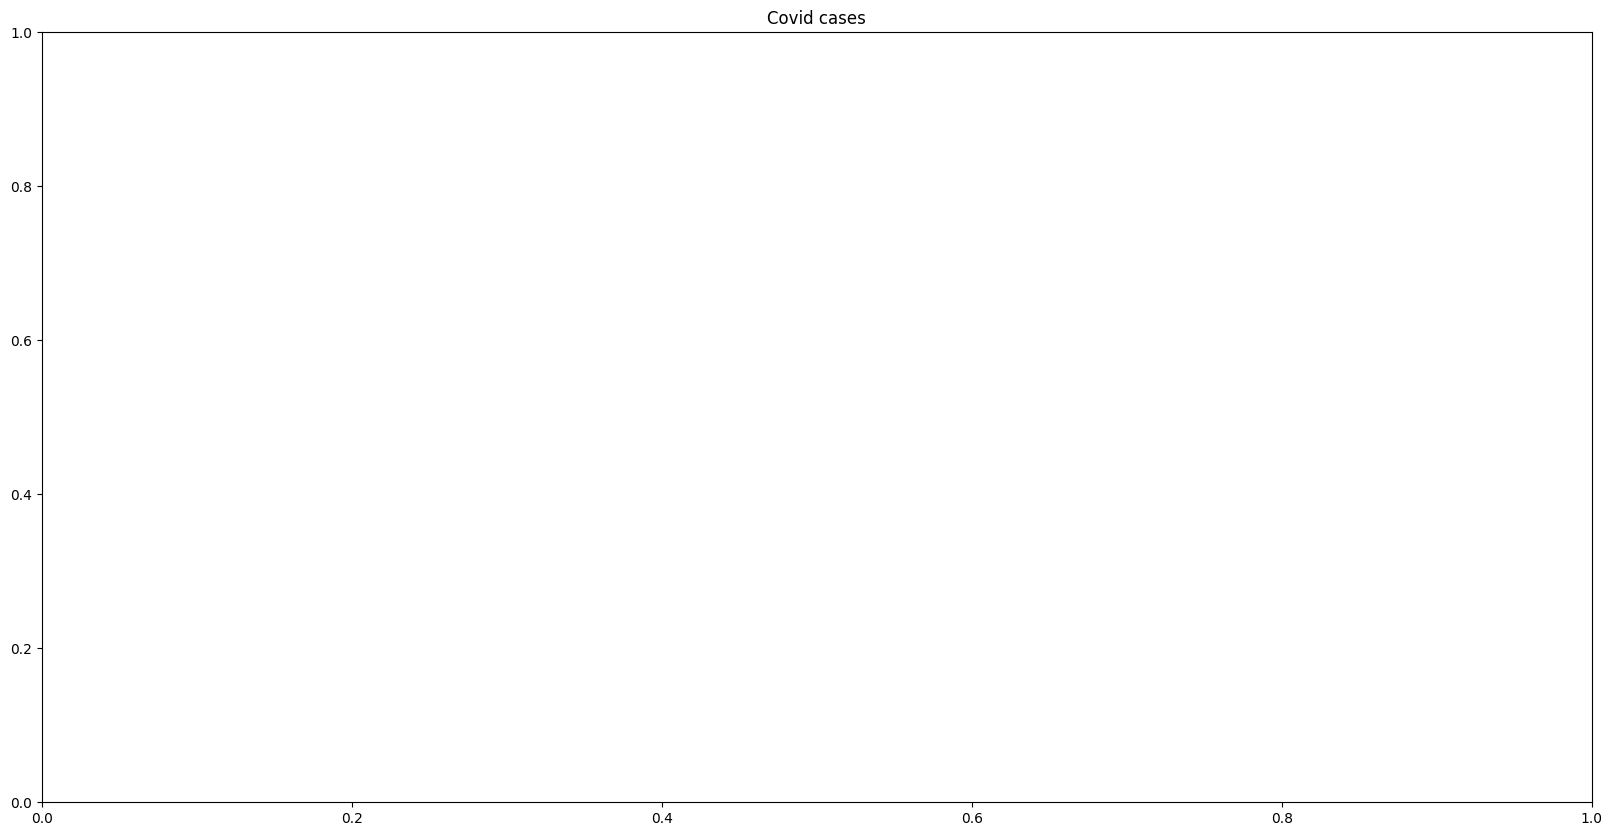

In [170]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(20,10))
plt.title("Covid cases")
print(df["continent"],df["total_cases"])
ax.plot(df["continent"],df["total_cases"])
plt.show()